In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import datetime

In [28]:
# !pip install pandas-datareader
import pandas_datareader as web

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
company = "FB" #ticker symbol for a company (e.g. FB for Facebook)
start = datetime.datetime(2012, 1, 1) #starting date for dataset
end = datetime.datetime(2022, 1, 1) #ending date for dataset

In [31]:
df = web.DataReader(company, 'yahoo', start, end) #fetching data from yahoo finance api

In [32]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2021-12-27,347.869995,338.010010,338.850006,346.179993,17795000,346.179993
2021-12-28,352.709991,345.200012,346.630005,346.220001,16637600,346.220001
2021-12-29,349.690002,341.640015,346.910004,342.940002,10747000,342.940002


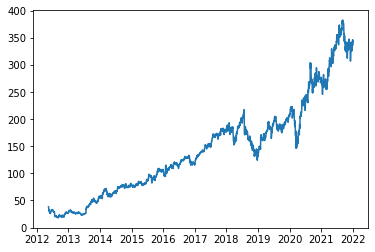

In [33]:
plt.plot(df.index, df["Close"]) #we are only interested in closing price

# Preprocessing Data for Sequential model

In [34]:
#Scaling all data in 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1)) #reshape is necessary because fit_transform only accept 2d array
scaled_data

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.89233093],
       [0.89622717],
       [0.8742489 ]])

In [35]:
df["Close"].values

array([ 38.22999954,  34.02999878,  31.        , ..., 342.94000244,
       344.35998535, 336.3500061 ])

In [36]:
df["Close"].values.reshape(-1,1)

array([[ 38.22999954],
       [ 34.02999878],
       [ 31.        ],
       ...,
       [342.94000244],
       [344.35998535],
       [336.3500061 ]])

In [37]:
pred_days = 60 #number of days you want to predict, to measure accuracy of model

In [38]:
X_train, y_train = [], []

In [39]:
#As we are gonna use LSTM and sequential modelling for prediction,
#we will provide first 60 closing price in first input of X_train
#and this first input(i.e, first array of 60 days closing price) will have 61th day's closing price as it's corresponding output 
#then next input will be 2nd day closing price to 61th day closing price and it's corresponding output will be 62th day's closing price

for x in range(pred_days, len(scaled_data)):
    X_train.append(scaled_data[x-pred_days:x,0])
    y_train.append(scaled_data[x,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [40]:
print(X_train.shape)
X_train

(2362, 60)


array([[0.05624914, 0.04472493, 0.03641103, ..., 0.00899986, 0.01119495,
        0.01061874],
       [0.04472493, 0.03641103, 0.03915489, ..., 0.01119495, 0.01061874,
        0.00727123],
       [0.03641103, 0.03915489, 0.04198107, ..., 0.01061874, 0.00727123,
        0.0095212 ],
       ...,
       [0.84648105, 0.86494717, 0.86681306, ..., 0.87120317, 0.90122102,
        0.90133079],
       [0.86494717, 0.86681306, 0.85468516, ..., 0.90122102, 0.90133079,
        0.89233093],
       [0.86681306, 0.85468516, 0.85696253, ..., 0.90133079, 0.89233093,
        0.89622717]])

In [41]:
print(y_train.shape) #notice first output of y_train and last input of 2nd array in X_train
y_train

(2362,)


array([0.00727123, 0.0095212 , 0.00587187, ..., 0.89233093, 0.89622717,
       0.8742489 ])

In [42]:
X_train.shape

(2362, 60)

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape) #adding one more dimension to X_train
X_train

(2362, 60, 1)


array([[[0.05624914],
        [0.04472493],
        [0.03641103],
        ...,
        [0.00899986],
        [0.01119495],
        [0.01061874]],

       [[0.04472493],
        [0.03641103],
        [0.03915489],
        ...,
        [0.01119495],
        [0.01061874],
        [0.00727123]],

       [[0.03641103],
        [0.03915489],
        [0.04198107],
        ...,
        [0.01061874],
        [0.00727123],
        [0.0095212 ]],

       ...,

       [[0.84648105],
        [0.86494717],
        [0.86681306],
        ...,
        [0.87120317],
        [0.90122102],
        [0.90133079]],

       [[0.86494717],
        [0.86681306],
        [0.85468516],
        ...,
        [0.90122102],
        [0.90133079],
        [0.89233093]],

       [[0.86681306],
        [0.85468516],
        [0.85696253],
        ...,
        [0.90133079],
        [0.89233093],
        [0.89622717]]])

# Building Neural Network model

In [44]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #prediction of next day's closing price

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))

0


In [48]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
74/74 [==============================] - 22s 149ms/step - loss: 0.0170
Epoch 2/25
74/74 [==============================] - 11s 146ms/step - loss: 0.0027
Epoch 3/25
74/74 [==============================] - 11s 144ms/step - loss: 0.0023
Epoch 4/25
74/74 [==============================] - 10s 140ms/step - loss: 0.0024
Epoch 5/25
74/74 [==============================] - 10s 129ms/step - loss: 0.0020
Epoch 6/25
74/74 [==============================] - 9s 121ms/step - loss: 0.0024
Epoch 7/25
74/74 [==============================] - 10s 138ms/step - loss: 0.0020
Epoch 8/25
74/74 [==============================] - 10s 139ms/step - loss: 0.0020
Epoch 9/25
74/74 [==============================] - 11s 142ms/step - loss: 0.0018
Epoch 10/25
74/74 [==============================] - 10s 140ms/step - loss: 0.0016
Epoch 11/25
74/74 [==============================] - 8s 103ms/step - loss: 0.0017
Epoch 12/25
74/74 [==============================] - 8s 112ms/step - loss: 0.0016
Epoch 13/25
74/7

In [54]:
model.save('fb_stock_price_predictor.h5', save_format="h5")

# Testing model accuracy on existing data but new for model

In [55]:
#loading test data
test_start = datetime.datetime(2022,1,1)
test_end = datetime.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

model_inputs

array([[0.85468516],
       [0.85696253],
       [0.84434084],
       [0.83973109],
       [0.84184391],
       [0.85279189],
       [0.84244757],
       [0.87147758],
       [0.88423651],
       [0.88640419],
       [0.88942245],
       [0.84203592],
       [0.85323092],
       [0.81788998],
       [0.80803953],
       [0.82093571],
       [0.83918237],
       [0.85677052],
       [0.85155712],
       [0.86127041],
       [0.87287697],
       [0.88736455],
       [0.88047744],
       [0.87155989],
       [0.8503499 ],
       [0.85062422],
       [0.88670605],
       [0.90500756],
       [0.89238578],
       [0.88637672],
       [0.88066953],
       [0.89880641],
       [0.8870353 ],
       [0.87671836],
       [0.88717246],
       [0.8653862 ],
       [0.87885857],
       [0.84162436],
       [0.80359449],
       [0.8030183 ],
       [0.79327755],
       [0.82354233],
       [0.83709701],
       [0.85836193],
       [0.8563315 ],
       [0.85613941],
       [0.86914528],
       [0.867

In [56]:
# Making predictions on testing data
X_test = []

for x in range(pred_days, len(model_inputs)):
    X_test.append(model_inputs[x-pred_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.85468516],
        [0.85696253],
        [0.84434084],
        ...,
        [0.89233093],
        [0.89622717],
        [0.8742489 ]],

       [[0.85696253],
        [0.84434084],
        [0.83973109],
        ...,
        [0.89622717],
        [0.8742489 ],
        [0.8742489 ]],

       [[0.84434084],
        [0.83973109],
        [0.84184391],
        ...,
        [0.8742489 ],
        [0.8742489 ],
        [0.88025796]],

       ...,

       [[0.86834962],
        [0.85806014],
        [0.87120317],
        ...,
        [0.46343808],
        [0.47825491],
        [0.51008371]],

       [[0.85806014],
        [0.87120317],
        [0.90122102],
        ...,
        [0.47825491],
        [0.51008371],
        [0.52163534]],

       [[0.87120317],
        [0.90122102],
        [0.90133079],
        ...,
        [0.51008371],
        [0.52163534],
        [0.54536976]]])

In [57]:
predicted_prices = model.predict(X_test)
predicted_prices

array([[0.82418084],
       [0.8262936 ],
       [0.8276988 ],
       [0.8283589 ],
       [0.82754064],
       [0.8258374 ],
       [0.8235669 ],
       [0.82078457],
       [0.8181256 ],
       [0.81579244],
       [0.8134419 ],
       [0.8114004 ],
       [0.80883145],
       [0.80571795],
       [0.80197847],
       [0.796893  ],
       [0.79094553],
       [0.7840024 ],
       [0.7760351 ],
       [0.7674148 ],
       [0.75907815],
       [0.7523248 ],
       [0.747988  ],
       [0.74643373],
       [0.7417543 ],
       [0.73244596],
       [0.7178837 ],
       [0.698694  ],
       [0.67704546],
       [0.65447855],
       [0.6318784 ],
       [0.6101067 ],
       [0.59013325],
       [0.5723108 ],
       [0.5563753 ],
       [0.54221207],
       [0.52956855],
       [0.51817423],
       [0.5085236 ],
       [0.50095904],
       [0.49554905],
       [0.4916866 ],
       [0.4892385 ],
       [0.48766166],
       [0.48644504],
       [0.4845714 ],
       [0.4818929 ],
       [0.478

In [58]:
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices

array([[318.1027 ],
       [318.87268],
       [319.38483],
       [319.6254 ],
       [319.32718],
       [318.70642],
       [317.87897],
       [316.86493],
       [315.89587],
       [315.04556],
       [314.18887],
       [313.4449 ],
       [312.5086 ],
       [311.3739 ],
       [310.01105],
       [308.15765],
       [305.99008],
       [303.4597 ],
       [300.55597],
       [297.41434],
       [294.37604],
       [291.91476],
       [290.33423],
       [289.76776],
       [288.06235],
       [284.66992],
       [279.3627 ],
       [272.36902],
       [264.47922],
       [256.2547 ],
       [248.01807],
       [240.08339],
       [232.80406],
       [226.30867],
       [220.50099],
       [215.33919],
       [210.73126],
       [206.5786 ],
       [203.06142],
       [200.30452],
       [198.33284],
       [196.92517],
       [196.03297],
       [195.4583 ],
       [195.01488],
       [194.33205],
       [193.35587],
       [192.29803],
       [191.22047],
       [190.02386],


# Plotting of predictions

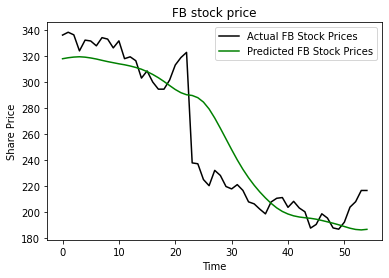

In [62]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Stock Prices")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Stock Prices")
plt.title(f"{company} stock price")
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
# plt.show()
plt.savefig('fb_predicted_vs_actual.jpg')